In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# See the first 5 rows to make sure it loaded correctly
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# The 'TotalCharges' column has some empty spaces. Let's turn them into a '0'.
# pd.to_numeric will try to convert the column to numbers. 'coerce' turns any errors into 'NaN' (Not a Number).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now we fill those few 'NaN' values with 0.
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Let's also convert our target 'Churn' column into numbers (1 for Yes, 0 for No) which is easier for analysis.
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("Data cleaning complete!")
df.info()

Data cleaning complete!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

         Contract  Churn_numeric
0  Month-to-month       0.427097
1        One year       0.112695
2        Two year       0.028319


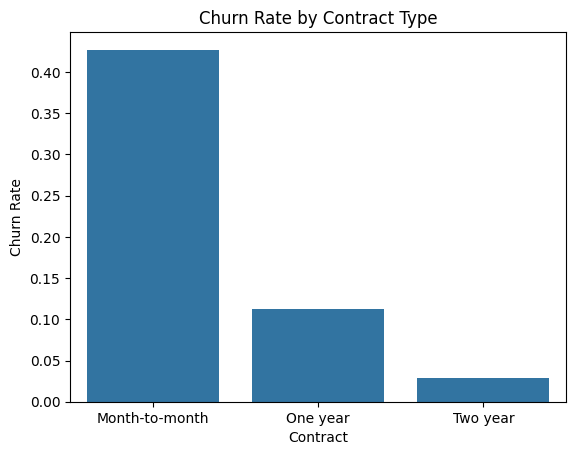

In [3]:
# Let's group by contract type and calculate the average churn rate for each
contract_churn = df.groupby('Contract')['Churn_numeric'].mean().reset_index()
print(contract_churn)

# Let's make a quick plot to visualize this
sns.barplot(data=contract_churn, x='Contract', y='Churn_numeric')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

           TechSupport  Churn_numeric
0                   No       0.416355
1  No internet service       0.074050
2                  Yes       0.151663


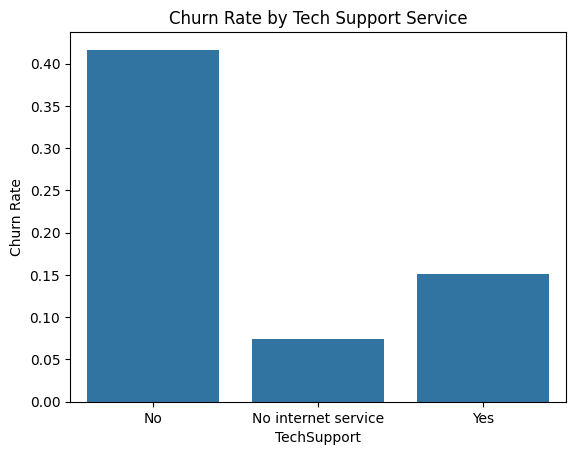

In [4]:
# Let's see if having tech support makes a difference
support_churn = df.groupby('TechSupport')['Churn_numeric'].mean().reset_index()
print(support_churn)

sns.barplot(data=support_churn, x='TechSupport', y='Churn_numeric')
plt.title('Churn Rate by Tech Support Service')
plt.ylabel('Churn Rate')
plt.show()

In [5]:
# We will save our cleaned dataframe to a new CSV file.
# index=False means we don't save the row numbers.
df.to_csv('cleaned_telco_churn.csv', index=False)

print("Cleaned data has been saved!")

Cleaned data has been saved!
